In [484]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [485]:
url = 'https://covid19.ncdc.gov.ng/'  #403 - Forbidden: Access is denied.

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    cases = soup.find('div', {'class': 'total-cases'}).text.strip()
    deaths = soup.find('div', {'class': 'total-deaths'}).text.strip()
    recoveries = soup.find('div', {'class': 'total-recoveries'}).text.strip()

    print("Total Cases:", cases)
    print("Total Deaths:", deaths)
    print("Total Recoveries:", recoveries)

else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

Failed to retrieve the webpage. Status code: 403


In [486]:
#Obtaining John Hopkins Data
data_confirmed = pd.read_csv('confirmed.csv')
data_recovered = pd.read_csv('recovered.csv')
data_deaths = pd.read_csv('deaths.csv') 

#External Data
data_budget = pd.read_csv('budget.csv')
data_ext = pd.read_csv('covid_external.csv')
data_nig = pd.read_csv('covid_external.csv')
data_gdp = pd.read_csv('RealGDP.csv')

In [487]:
#Data Desciption
#Global Daily Confirmed Cases
print(data_confirmed.head().T)
data_confirmed.info()

                          0        1        2        3        4
Province/State          NaN      NaN      NaN      NaN      NaN
Country/Region  Afghanistan  Albania  Algeria  Andorra   Angola
Lat                33.93911  41.1533  28.0339  42.5063 -11.2027
Long              67.709953  20.1683   1.6596   1.5218  17.8739
1/22/20                   0        0        0        0        0
...                     ...      ...      ...      ...      ...
3/5/23               209390   334427   271477    47875   105277
3/6/23               209406   334427   271477    47875   105277
3/7/23               209436   334427   271490    47875   105277
3/8/23               209451   334443   271494    47890   105288
3/9/23               209451   334457   271496    47890   105288

[1147 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [488]:
#Data Desciption
#Global Daily Recovered Cases
print(data_recovered.head().T)
data_recovered.info()

                          0        1        2        3        4
Province/State          NaN      NaN      NaN      NaN      NaN
Country/Region  Afghanistan  Albania  Algeria  Andorra   Angola
Lat                33.93911  41.1533  28.0339  42.5063 -11.2027
Long              67.709953  20.1683   1.6596   1.5218  17.8739
1/22/20                   0        0        0        0        0
...                     ...      ...      ...      ...      ...
3/5/23                    0        0        0        0        0
3/6/23                    0        0        0        0        0
3/7/23                    0        0        0        0        0
3/8/23                    0        0        0        0        0
3/9/23                    0        0        0        0        0

[1147 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB


In [489]:
#Data Desciption
#Global Daily Death Cases
print(data_deaths.head())
data_deaths.info()

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...     7896    7896    7896    7896   
1        0        0        0        0  ...     3598    3598    3598    3598   
2        0        0        0        0  ...     6881    6881    6881    6881   
3        0        0        0        0  ...      165     165     165     165   
4        0        0        0        0  ...     1933    1933    1933    1933   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896   

In [490]:
#Data Cleaning
del data_confirmed['Province/State']
del data_recovered['Province/State']
del data_deaths['Province/State']

data_confirmed.dtypes

Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
1/23/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1146, dtype: object

EDA

In [ ]:

date_columns = data_confirmed.columns[4:]
data_confirmed.rename(columns={
    'Country/Region': 'Country_Region'
}, inplace=True)

date_columns = pd.to_datetime(date_columns)
data_confirmed.columns = list(data_confirmed.columns[:4]) + list(date_columns)
print(date_columns)
print(data_confirmed.head())

data_confirmed['Lat'] = pd.to_numeric(data_confirmed['Lat'], errors='coerce')
data_confirmed['Long'] = pd.to_numeric(data_confirmed['Long'], errors='coerce')

data_confirmed.drop_duplicates(inplace=True)

data_confirmed.fillna(0, inplace=True)  

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09'],
              dtype='datetime64[ns]', length=1142, freq=None)
  Country_Region       Lat       Long  1/22/20  2020-01-23 00:00:00  \
0    Afghanistan  33.93911  67.709953        0                    0   
1        Albania  41.15330  20.168300        0                    0   
2        Algeria  28.03390   1.659600        0                    0   
3        Andorra  42.50630   1.521800        0                    0   
4         Angola -11.20270  17.873900        0                    0   

   2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
0                    0                    0          

In [492]:
date_columns = data_recovered.columns[4:]
data_recovered.rename(columns={
    'Country/Region': 'Country_Region'
}, inplace=True)

date_columns = pd.to_datetime(date_columns)
data_recovered.columns = list(data_recovered.columns[:4]) + list(date_columns)
print(date_columns)
print(data_recovered.head())

data_recovered['Lat'] = pd.to_numeric(data_recovered['Lat'], errors='coerce')
data_recovered['Long'] = pd.to_numeric(data_recovered['Long'], errors='coerce')

data_recovered.drop_duplicates(inplace=True)

data_recovered.fillna(0, inplace=True)  

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09'],
              dtype='datetime64[ns]', length=1142, freq=None)
  Country_Region       Lat       Long  1/22/20  2020-01-23 00:00:00  \
0    Afghanistan  33.93911  67.709953        0                    0   
1        Albania  41.15330  20.168300        0                    0   
2        Algeria  28.03390   1.659600        0                    0   
3        Andorra  42.50630   1.521800        0                    0   
4         Angola -11.20270  17.873900        0                    0   

   2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
0                    0                    0          

In [493]:
date_columns = data_deaths.columns[4:]
data_deaths.rename(columns={
    'Country/Region': 'Country_Region'
}, inplace=True)

date_columns = pd.to_datetime(date_columns,)
data_deaths.columns = list(data_deaths.columns[:4]) + list(date_columns)
print(date_columns)
print(data_deaths.head())

data_deaths['Lat'] = pd.to_numeric(data_deaths['Lat'], errors='coerce')
data_deaths['Long'] = pd.to_numeric(data_deaths['Long'], errors='coerce')

data_deaths.drop_duplicates(inplace=True)

data_deaths.fillna(0, inplace=True)  

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09'],
              dtype='datetime64[ns]', length=1142, freq=None)
  Country_Region       Lat       Long  1/22/20  2020-01-23 00:00:00  \
0    Afghanistan  33.93911  67.709953        0                    0   
1        Albania  41.15330  20.168300        0                    0   
2        Algeria  28.03390   1.659600        0                    0   
3        Andorra  42.50630   1.521800        0                    0   
4         Angola -11.20270  17.873900        0                    0   

   2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
0                    0                    0          

Analysis on Nigeria Data
#Extracted for Confirmed, Recovered, and Death Daily Cases

In [494]:
nig_c= data_confirmed[data_confirmed['Country_Region'] == 'Nigeria']
nig_r = data_recovered[data_recovered['Country_Region'] == 'Nigeria']
nig_d = data_deaths[data_deaths['Country_Region'] == 'Nigeria']


In [495]:
data_nigconfirmed = pd.DataFrame(nig_c)
data_nigconfirmed = data_nigconfirmed.drop(columns=['Country_Region', 'Lat', 'Long'])
data_nigconfirmed = data_nigconfirmed.T.reset_index()
data_nigconfirmed.columns = ['Date', 'Cases']
data_nigconfirmed['Cases'] = pd.to_numeric(data_nigconfirmed['Cases'], errors='coerce')
data_nigconfirmed

,Date,Cases
0,1/22/20,0
1,2020-01-23 00:00:00,0
2,2020-01-24 00:00:00,0
3,2020-01-25 00:00:00,0
4,2020-01-26 00:00:00,0
...,...,...
1138,2023-03-05 00:00:00,266598
1139,2023-03-06 00:00:00,266598
1140,2023-03-07 00:00:00,266598
1141,2023-03-08 00:00:00,266598


In [496]:
data_nigrecovered = pd.DataFrame(nig_r)
data_nigrecovered = data_nigrecovered.drop(columns=['Country_Region', 'Lat', 'Long'])
data_nigrecovered = data_nigrecovered.T.reset_index()
data_nigrecovered.columns = ['Date', 'Cases']
data_nigrecovered['Cases'] = pd.to_numeric(data_nigrecovered['Cases'], errors='coerce')
data_nigrecovered

,Date,Cases
0,1/22/20,0
1,2020-01-23 00:00:00,0
2,2020-01-24 00:00:00,0
3,2020-01-25 00:00:00,0
4,2020-01-26 00:00:00,0
...,...,...
1138,2023-03-05 00:00:00,0
1139,2023-03-06 00:00:00,0
1140,2023-03-07 00:00:00,0
1141,2023-03-08 00:00:00,0


In [497]:
data_nigdeaths = pd.DataFrame(nig_c)
data_nigdeaths = data_nigdeaths.drop(columns=['Country_Region', 'Lat', 'Long'])
data_nigdeaths = data_nigdeaths.T.reset_index()
data_nigdeaths.columns = ['Date', 'Cases']
data_nigdeaths['Cases'] = pd.to_numeric(data_nigdeaths['Cases'], errors='coerce')
data_nigdeaths

,Date,Cases
0,1/22/20,0
1,2020-01-23 00:00:00,0
2,2020-01-24 00:00:00,0
3,2020-01-25 00:00:00,0
4,2020-01-26 00:00:00,0
...,...,...
1138,2023-03-05 00:00:00,266598
1139,2023-03-06 00:00:00,266598
1140,2023-03-07 00:00:00,266598
1141,2023-03-08 00:00:00,266598


Data Analysis

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [498]:
data_lab = pd.read_csv('covidnig.csv')
data_lab.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'],
      dtype='object')

In [499]:
data_lab.rename(columns={'States Affected':'state', 
                         'No. of Cases (Lab Confirmed)': 'lab_confirmed',
                         'No. of Cases (on admission)':'lab_admission',
                         'No. Discharged':'no_discharged',
                         'No. of Deaths':'no_death'}, inplace=True)

data_lab.head()

,state,lab_confirmed,lab_admission,no_discharged,no_death
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [500]:
data_lab['lab_confirmed']=data_lab['lab_confirmed'].str.replace(',','').astype(int)
data_lab['lab_admission']=data_lab['lab_admission'].str.replace(',','').astype(int)
data_lab['no_discharged']=data_lab['no_discharged'].str.replace(',','').astype(int)

data_lab_confirmed = data_lab.sort_values(by='lab_confirmed', ascending=False).reset_index()
data_lab_confirmed

,index,state,lab_confirmed,lab_admission,no_discharged,no_death
0,0,Lagos,26708,2435,24037,236
1,1,FCT,9627,2840,6694,93
2,2,Kaduna,4504,579,3877,48
3,3,Plateau,4262,280,3948,34
4,4,Oyo,3788,368,3374,46
5,5,Rivers,3279,232,2987,60
6,6,Edo,2768,52,2603,113
7,7,Ogun,2382,174,2175,33
8,8,Kano,2032,198,1778,56
9,9,Delta,1843,57,1737,49


In [501]:
top_10_confirmed = data_lab[:10]
top_10_confirmed

,state,lab_confirmed,lab_admission,no_discharged,no_death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


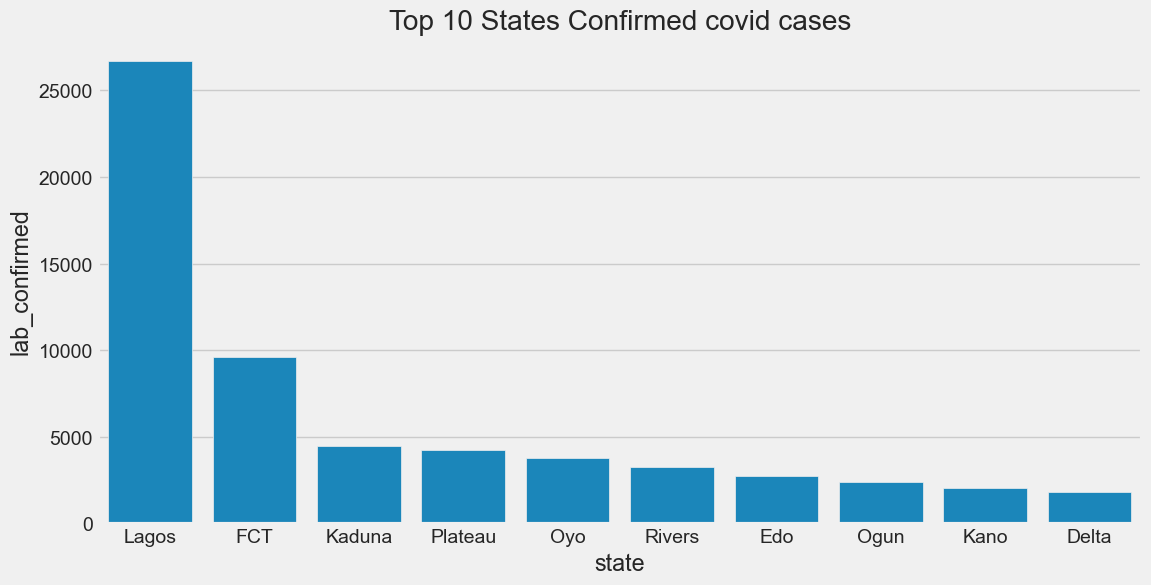

In [502]:
plt.figure(figsize=(12,6))
sns.barplot(top_10_confirmed, x='state', y='lab_confirmed')
plt.title('Top 10 States Confirmed covid cases')
plt.show()

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [503]:
data_lab_discharged = data_lab.sort_values(by='no_discharged', ascending=False).reset_index()
top_10_discharged = data_lab_discharged[:10]

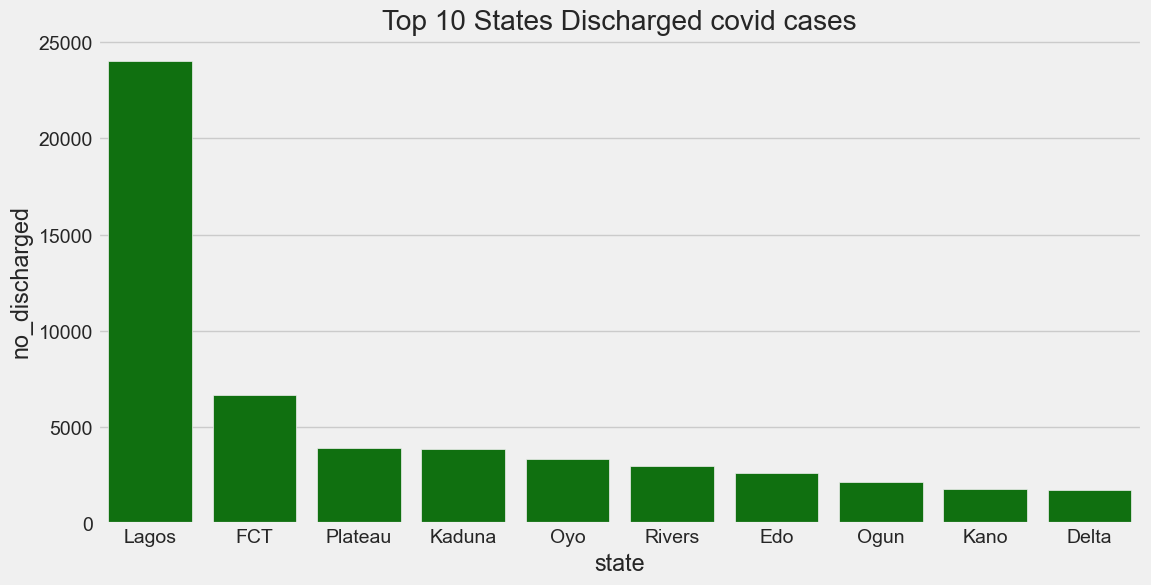

In [504]:
plt.figure(figsize=(12,6))
sns.barplot(top_10_discharged, x='state', y='no_discharged', color='green')
plt.title('Top 10 States Discharged covid cases')
plt.show()

TODO D - Plot the top 10 Death cases

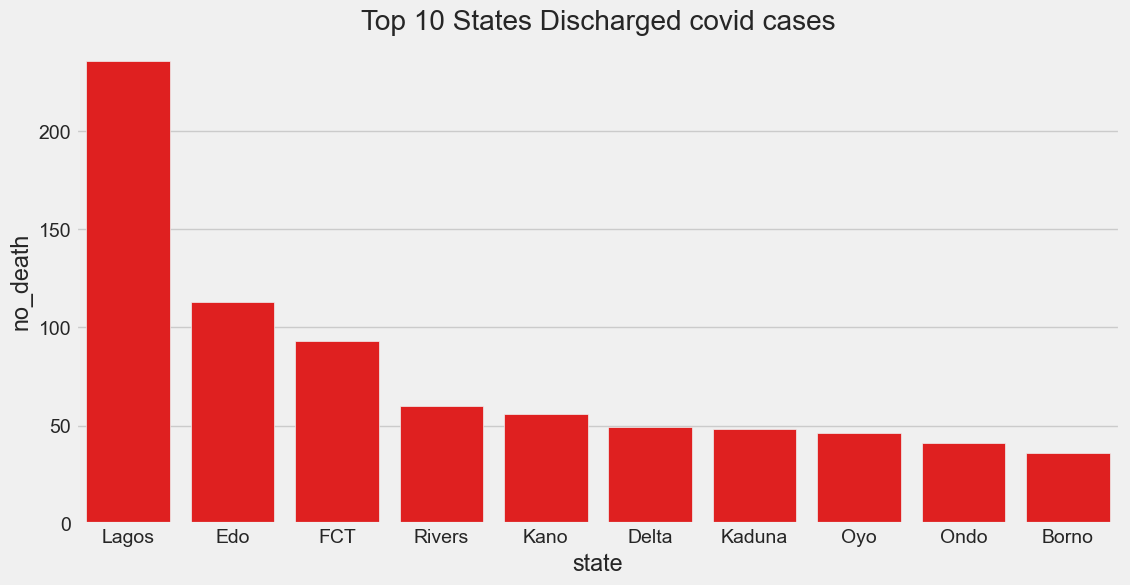

In [505]:
data_lab_death = data_lab.sort_values(by='no_death', ascending=False).reset_index()
top_10_death = data_lab_death[:10]
plt.figure(figsize=(12,6))
sns.barplot(top_10_death, x='state', y='no_death', color='red')
plt.title('Top 10 States Discharged covid cases')
plt.show()

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

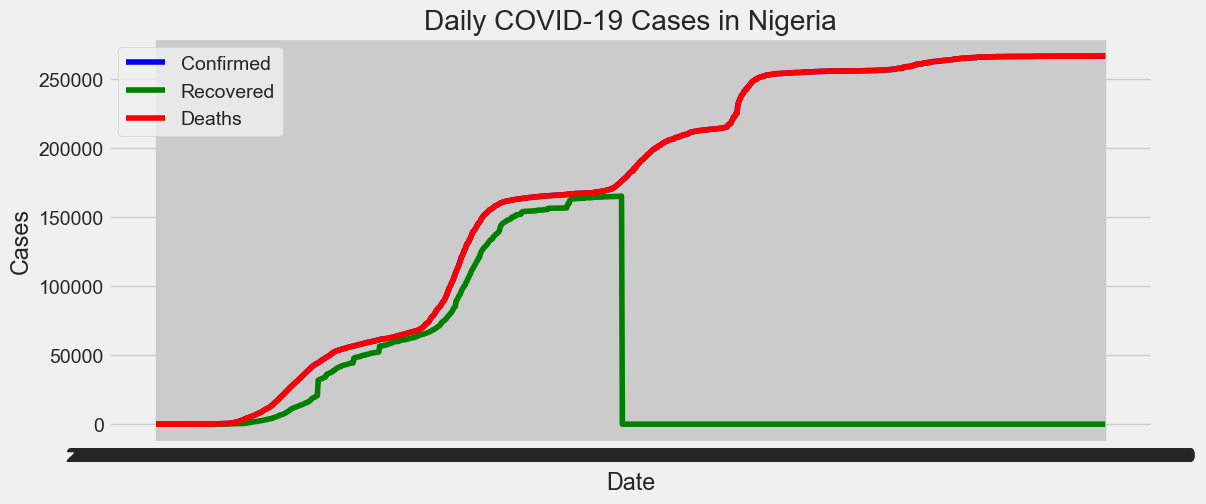

In [506]:
data_nigconfirmed['Date'] = data_nigconfirmed['Date'].astype(str)
data_nigrecovered['Date'] = data_nigrecovered['Date'].astype(str)
data_nigdeaths['Date'] = data_nigdeaths['Date'].astype(str)

#Lineplots for daily cases
plt.figure(figsize=(12, 5))
sns.lineplot(data=data_nigconfirmed, x='Date', y='Cases', color='blue', label='Confirmed')
sns.lineplot(data=data_nigrecovered, x='Date', y='Cases', color='green', label='Recovered')
sns.lineplot(data=data_nigdeaths, x='Date', y='Cases', color='red', label='Deaths')
plt.title('Daily COVID-19 Cases in Nigeria')
plt.legend()
plt.show()

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [507]:
data_nigconfirmed['Date'] = pd.to_datetime(data_nigconfirmed['Date'], errors='coerce')
data_nigconfirmed['Cases'] = pd.to_numeric(data_nigconfirmed['Cases'], errors='coerce')
data_rate = pd.DataFrame(columns= [data_nigconfirmed['Date'] , data_nigconfirmed['Cases'].diff()])
data_rate = data_rate.T

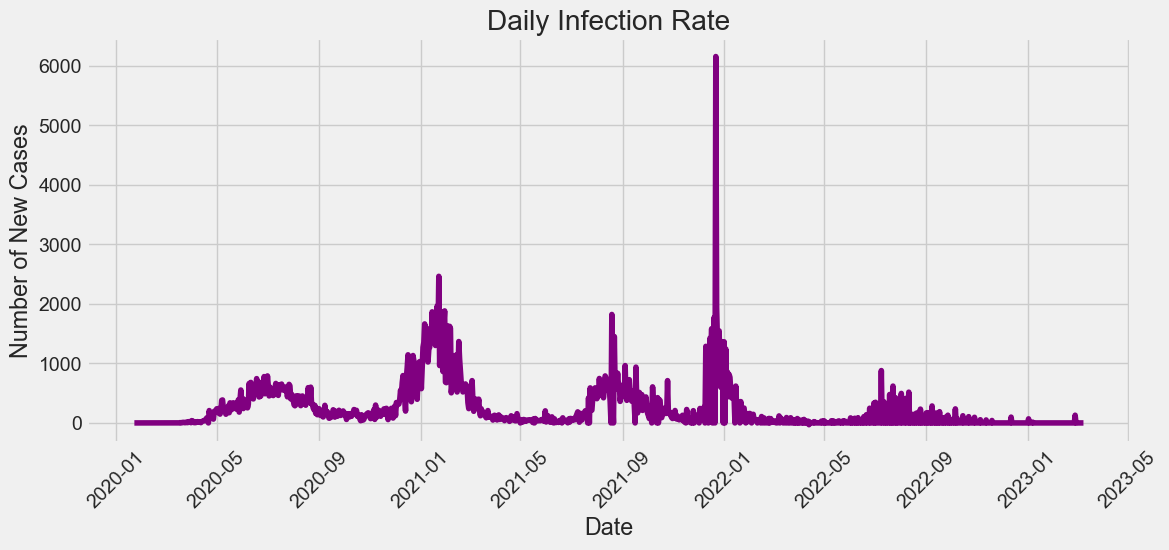

In [508]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=data_rate, x='Date', y='Cases', color='purple')
plt.title('Daily Infection Rate')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45)
plt.show()

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [509]:
data_rate.sort_values(by='Cases', ascending=False).max
#Maximum infection rate on 12/22/2021

<bound method DataFrame.max of Empty DataFrame
Columns: []
Index: [(2021-12-22 00:00:00, 6158.0), (2021-01-23 00:00:00, 2464.0), (2021-01-21 00:00:00, 1964.0), (2021-12-23 00:00:00, 1940.0), (2021-01-30 00:00:00, 1883.0), (2021-01-15 00:00:00, 1867.0), (2021-01-27 00:00:00, 1861.0), (2021-08-19 00:00:00, 1823.0), (2021-12-20 00:00:00, 1772.0), (2021-01-06 00:00:00, 1664.0), (2021-01-29 00:00:00, 1650.0), (2021-02-02 00:00:00, 1634.0), (2021-02-05 00:00:00, 1624.0), (2021-01-18 00:00:00, 1617.0), (2021-01-16 00:00:00, 1598.0), (2021-02-06 00:00:00, 1588.0), (2021-01-09 00:00:00, 1585.0), (2021-12-17 00:00:00, 1584.0), (2021-01-07 00:00:00, 1565.0), (2021-12-26 00:00:00, 1547.0), (2021-01-08 00:00:00, 1544.0), (2021-01-22 00:00:00, 1483.0), (2021-01-14 00:00:00, 1479.0), (2021-08-22 00:00:00, 1452.0), (2021-01-17 00:00:00, 1444.0), (2021-01-25 00:00:00, 1430.0), (2021-12-15 00:00:00, 1424.0), (2021-01-13 00:00:00, 1398.0), (2021-01-20 00:00:00, 1386.0), (2021-12-29 00:00:00, 1368.0), (20

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [510]:
data_ext = pd.read_csv('covid_external.csv')
data_ext.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [511]:
data_ext.columns = data_ext.columns.str.lower().str.replace(' ', '_')
data_ext

,states,region,population,overall_ccvi_index,age,epidemiological,fragility,health_system,population_density,socio-economic,_transport_availability,acute_ihr
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [512]:
top_10_confirmed

,state,lab_confirmed,lab_admission,no_discharged,no_death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [513]:
data_ccvi = pd.DataFrame(columns=[top_10_confirmed['state'],top_10_confirmed['lab_confirmed'],data_ext['overall_ccvi_index'][:10]])
data_ccvi.T

,,
state,lab_confirmed,overall_ccvi_index
Lagos,26708,0.3
FCT,9627,0.4
Kaduna,4504,0.3
Plateau,4262,0.1
Oyo,3788,0.6
Rivers,3279,0.5
Edo,2768,0.1
Ogun,2382,0.8
Kano,2032,1.0


In [514]:
data_ccvi = data_ccvi.T

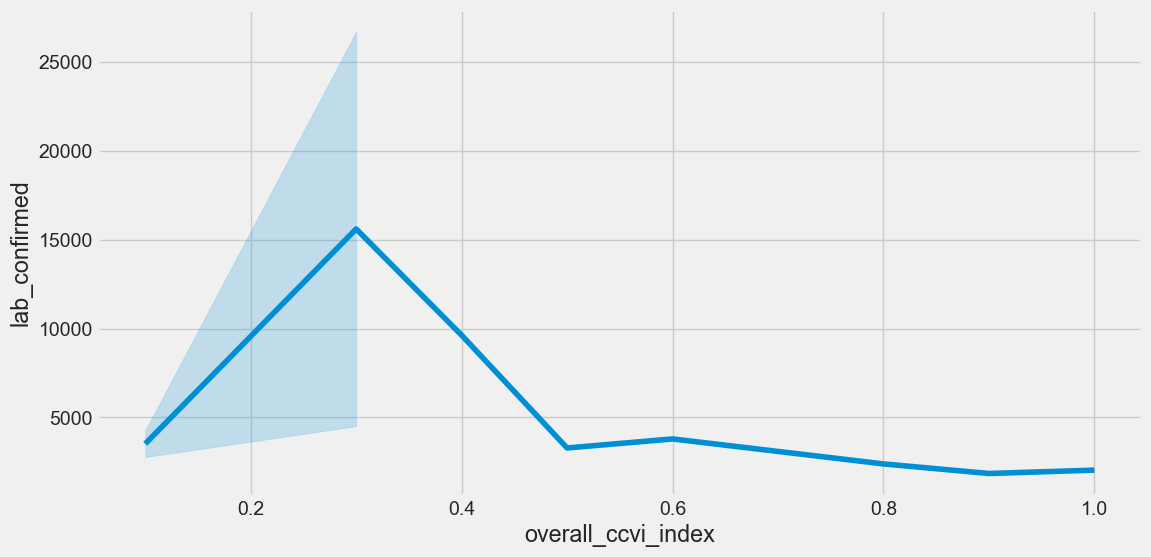

In [515]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data_ccvi, x='overall_ccvi_index', y='lab_confirmed')
plt.show()

The graph shows the highest overall vulnerability index(0.3) within the shaded region. Values here indicate the state as Lagos having the highest confirmed covid-19 cases.

TODO I could not be analysed

#No data found on ncdc site and therefore couldn't be scrapped for analysis

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [516]:
data_gdp = pd.read_csv('RealGDP.csv')
data_gdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


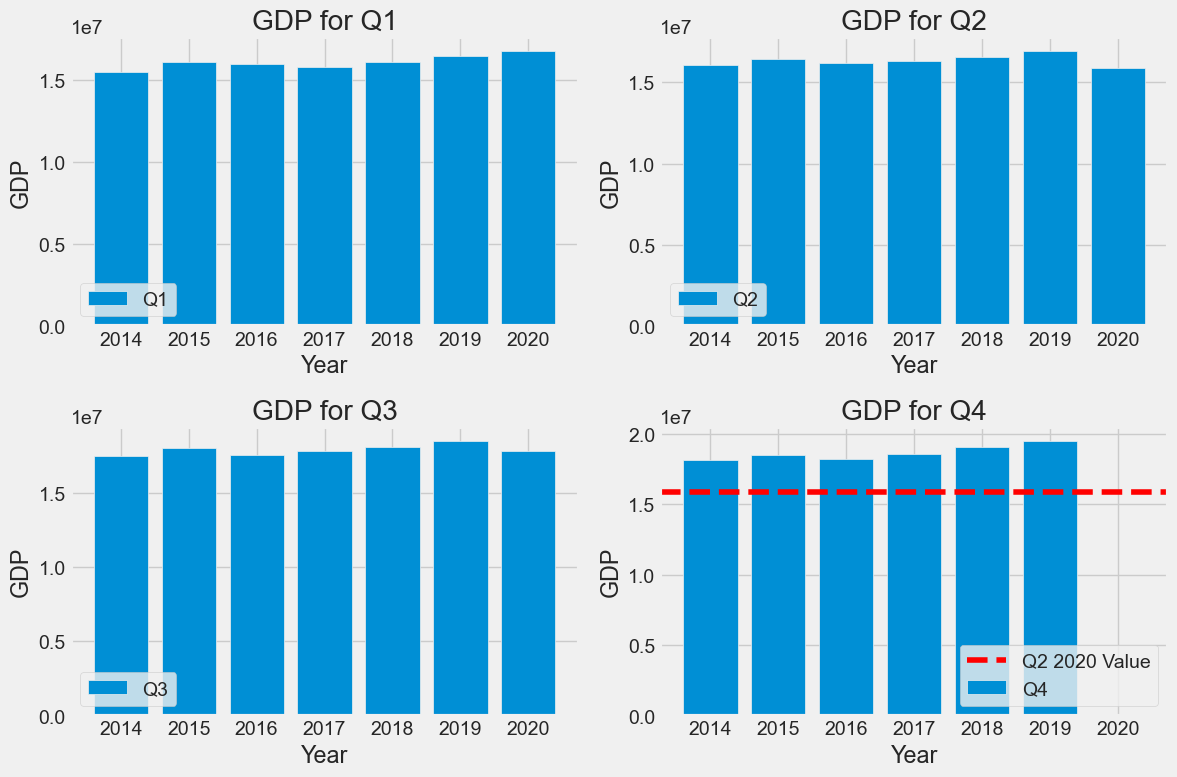

In [517]:

#using pd.melt
data_gdpmelt = pd.melt(data_gdp, id_vars=["Year"], value_vars=["Q1", "Q2", "Q3", "Q4"],
                    var_name="Quarter", value_name="GDP")

# Create the barplot
plt.figure(figsize=(12, 8))
quarters = ["Q1", "Q2", "Q3", "Q4"]

# Plot each quarter as a separate bar group
for i, quarter in enumerate(quarters, start=1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    subset = data_gdpmelt[data_gdpmelt["Quarter"] == quarter]
    plt.bar(subset["Year"], subset["GDP"], label=quarter)
    plt.title(f"GDP for {quarter}")
    plt.xlabel("Year")
    plt.ylabel("GDP")
    plt.legend(loc="lower left")

# Add a horizontal line at Q2 2020 (example: 16,500,000)
plt.axhline(y=15890000.00, color='red', linestyle='--', label="Q2 2020 Value")
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


As shown in the combined barchart, the gross domestic product (GDP) generally increases across the quarters from Q1 to Q4 each year, indicating seasonal economic growth patterns. 

The horizontal line at Q2 2020 serves as a benchmark for comparison. It appears that most of the previous GDP values exceed this level, suggesting that Q2 2020 might have been an economically challenging period due to the COVID-19 pandemic.